## 01. 정형 데이터마이닝

### 1)


- 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.) 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오

In [24]:
library(tidyverse)

In [2]:
setwd("C:/Soongsil/R/ADP/모의고사 R코드 및 데이터/모의고사 1회")

In [3]:
lotto <- read.csv("lotto.csv")

In [4]:
str(lotto)

'data.frame':	859 obs. of  7 variables:
 $ time_id: int  859 858 857 856 855 854 853 852 851 850 ...
 $ num1   : int  8 9 6 10 8 20 2 11 14 16 ...
 $ num2   : int  22 13 10 24 15 25 8 17 18 20 ...
 $ num3   : int  35 32 16 40 17 31 23 28 22 24 ...
 $ num4   : int  38 38 28 41 19 32 26 30 26 28 ...
 $ num5   : int  39 39 34 43 43 36 27 33 31 36 ...
 $ num6   : int  41 43 38 44 44 43 44 35 44 39 ...


In [5]:
sum(is.na(lotto))

[1] 0

In [25]:
library(reshape2)

In [7]:
lot_melt <- melt(lotto, id.vars = 1)
lot_melt2 <- lot_melt[, -2]
str(lot_melt2)

'data.frame':	5154 obs. of  2 variables:
 $ time_id: int  859 858 857 856 855 854 853 852 851 850 ...
 $ value  : int  8 9 6 10 8 20 2 11 14 16 ...


In [26]:
library(arules)

In [9]:
lot_sp <- split(lot_melt2$value, lot_melt2$time_id)
lot_ts <- as(lot_sp, "transactions")

In [10]:
lot_ts

transactions in sparse format with
 859 transactions (rows) and
 45 items (columns)

In [11]:
inspect(lot_ts %>% head) 

    items                    transactionID
[1] {10, 23, 29, 33, 37, 40} 1            
[2] {9, 13, 21, 25, 32, 42}  2            
[3] {11, 16, 19, 21, 27, 31} 3            
[4] {14, 27, 30, 31, 40, 42} 4            
[5] {16, 24, 29, 40, 41, 42} 5            
[6] {14, 15, 26, 27, 40, 42} 6            


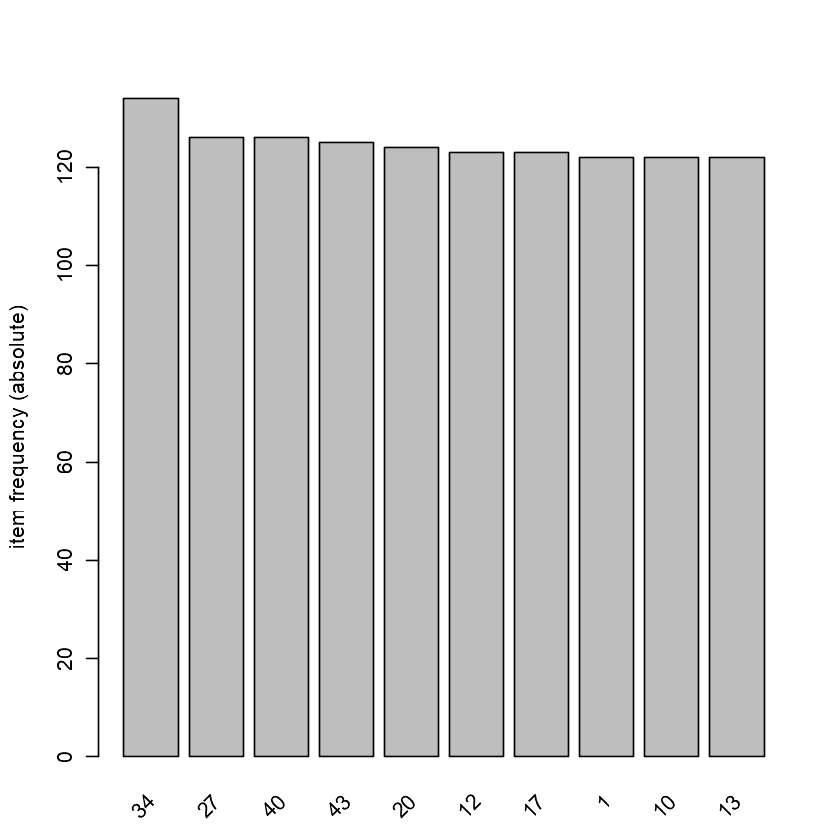

In [12]:
itemFrequencyPlot(lot_ts, topN = 10, type = "absolute") # 도수를 기준으로 막대그래프 생성

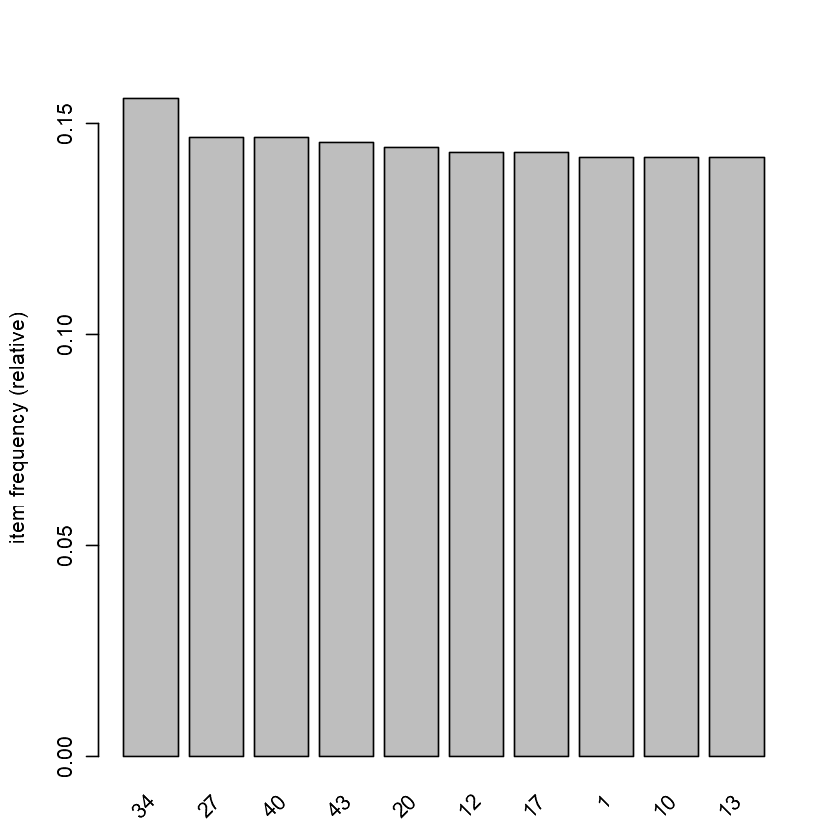

In [13]:
itemFrequencyPlot(lot_ts, topN = 10) # 상대도수를 기준으로 막대그래프 생성

- **대부분의 번호가 비슷한 빈도로 추첨, 하지만 그 중에서도 34번이 가장 많이 추첨됨**

### 2)

- 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  

In [14]:
rules_1 <- apriori(lot_ts, 
                   parameter = list(supp = 0.002, conf = 0.8, minlen = 2, maxlen = 6))
rules_1

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      2
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[45 item(s), 859 transaction(s)] done [0.00s].
sorting and recoding items ... [45 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [679 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 679 rules 

In [15]:
rules_2 <- sort(rules_1, by = "lift", decreasing = T) %>% head(30)
rules_2

set of 30 rules 

In [16]:
rules_3 <- inspect(rules_2) %>% as("data.frame")

     lhs                 rhs  support     confidence coverage    lift     count
[1]  {32, 38, 43}     => {9}  0.002328289 1          0.002328289 9.651685 2    
[2]  {7, 23, 28}      => {9}  0.002328289 1          0.002328289 9.651685 2    
[3]  {18, 23, 35}     => {9}  0.002328289 1          0.002328289 9.651685 2    
[4]  {14, 17, 33}     => {9}  0.002328289 1          0.002328289 9.651685 2    
[5]  {7, 23, 29}      => {22} 0.002328289 1          0.002328289 9.336957 2    
[6]  {10, 27, 42}     => {22} 0.002328289 1          0.002328289 9.336957 2    
[7]  {25, 31, 45}     => {22} 0.002328289 1          0.002328289 9.336957 2    
[8]  {21, 26, 37}     => {22} 0.002328289 1          0.002328289 9.336957 2    
[9]  {24, 36, 38}     => {22} 0.002328289 1          0.002328289 9.336957 2    
[10] {7, 24, 31}      => {22} 0.002328289 1          0.002328289 9.336957 2    
[11] {7, 31, 34}      => {22} 0.002328289 1          0.002328289 9.336957 2    
[12] {33, 36, 37}     => {22} 0.00232828

In [17]:
write.csv(rules_3, "lotto_rules.csv")

### 3)

- 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 ‘rules_most_freq’라는 변수에 저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [18]:
summary(rules_1)

set of 679 rules

rule length distribution (lhs + rhs):sizes
  4   5 
632  47 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.069   4.000   5.000 

summary of quality measures:
    support           confidence    coverage             lift      
 Min.   :0.002328   Min.   :1    Min.   :0.002328   Min.   :6.410  
 1st Qu.:0.002328   1st Qu.:1    1st Qu.:0.002328   1st Qu.:7.041  
 Median :0.002328   Median :1    Median :0.002328   Median :7.280  
 Mean   :0.002364   Mean   :1    Mean   :0.002364   Mean   :7.434  
 3rd Qu.:0.002328   3rd Qu.:1    3rd Qu.:0.002328   3rd Qu.:7.670  
 Max.   :0.003492   Max.   :1    Max.   :0.003492   Max.   :9.652  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.031  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
   data ntransactions support confidence
 lot_ts           859   0.002        0.8
                                                                                       call
 apriori(

- **총 679개의 연관규칙이 도출, 그 중 632개의 규칙은 4개의 로또번호로 구성, 47개는 5개의 로또번호로 구성**
- **규칙들에 대한 최소 향상도는 6.41, 추첨번호들의 교집합 확률을 의미하는 지지도의 평균은 0.002364**
- **트랜잭션 데이터의 개수는 859개, 트랜잭션 데이터는 859회 동안의 로또 당첨번호들을 의미**

In [19]:
rules_most_freq <- subset(rules_1, rhs %in% "34")

In [20]:
inspect(rules_most_freq)

     lhs                 rhs  support     confidence coverage    lift     count
[1]  {7, 22, 31}      => {34} 0.002328289 1          0.002328289 6.410448 2    
[2]  {22, 24, 31}     => {34} 0.002328289 1          0.002328289 6.410448 2    
[3]  {17, 32, 33}     => {34} 0.003492433 1          0.003492433 6.410448 3    
[4]  {23, 42, 45}     => {34} 0.002328289 1          0.002328289 6.410448 2    
[5]  {15, 19, 41}     => {34} 0.002328289 1          0.002328289 6.410448 2    
[6]  {2, 15, 28}      => {34} 0.002328289 1          0.002328289 6.410448 2    
[7]  {5, 13, 29}      => {34} 0.002328289 1          0.002328289 6.410448 2    
[8]  {5, 17, 29}      => {34} 0.002328289 1          0.002328289 6.410448 2    
[9]  {17, 42, 45}     => {34} 0.002328289 1          0.002328289 6.410448 2    
[10] {14, 25, 44}     => {34} 0.002328289 1          0.002328289 6.410448 2    
[11] {2, 15, 21}      => {34} 0.002328289 1          0.002328289 6.410448 2    
[12] {19, 21, 44}     => {34} 0.00232828

- **총 19개의 규칙**
- {7, 22, 31}번과 {34}가 함께 추첨될 확률은 support를 확인한 결과 0.002328289, 이 규칙의 lift는 6.410448로, {34}만 추첨됏을 때 보다 {7, 22, 31}번이 뽑히고 {34}도 뽑힐 확률이 약 6배 높다는 것을 의미
- 하지만 이러한 규칙들은 로또번호가 추첨되는 순서를 고려하지 않고 단순히 조합에 대한 확률만을 고려한 규칙이므로, 향상도가 높은 숫자들의 조합이 로또 추첨번호가 될 가능성이 높응 것은 아니다.

 ## 02. 통계분석

### 1)
- FIFA 데이터에서 각 선수의 키는 Height변수에 피트와 인치로 입력되있음, 이를 cm로 변환하여 새로운 변수 Height_cm을 생성
- (1피트 = 30cm, 1인치 = 2.5cm)

In [21]:
fifa <- read.csv("FIFA.csv")
sum(is.na(fifa))

[1] 0

In [22]:
head(fifa)
str(fifa)

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
2,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
3,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
4,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
5,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355
6,183277,E. Hazard,27,Belgium,91,Chelsea,Right,High/ Medium,LF,10,2020,5'8,163,172100,93000,340


'data.frame':	16642 obs. of  16 variables:
 $ ID                  : int  158023 20801 190871 193080 192985 183277 177003 176580 155862 200389 ...
 $ Name                : chr  "L. Messi" "Cristiano Ronaldo" "Neymar Jr" "De Gea" ...
 $ Age                 : int  31 33 26 27 27 27 32 31 32 25 ...
 $ Nationality         : chr  "Argentina" "Portugal" "Brazil" "Spain" ...
 $ Overall             : int  94 94 92 91 91 91 91 91 91 90 ...
 $ Club                : chr  "FC Barcelona" "Juventus" "Paris Saint-Germain" "Manchester United" ...
 $ Preferred_Foot      : chr  "Left" "Right" "Right" "Right" ...
 $ Work_Rate           : chr  "Medium/ Medium" "High/ Low" "High/ Medium" "Medium/ Medium" ...
 $ Position            : chr  "RF" "ST" "LW" "GK" ...
 $ Jersey_Number       : int  10 7 10 1 7 10 10 9 15 1 ...
 $ Contract_Valid_Until: int  2021 2022 2022 2020 2023 2020 2020 2021 2020 2021 ...
 $ Height              : chr  "5'7" "6'2" "5'9" "6'4" ...
 $ Weight_lb           : int  159 183 150 168 154

In [23]:
str(fifa$Height)

 chr [1:16642] "5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "5'8" "6'0" "6'0" "6'2" ...


In [39]:
fifa$Height_cm <- as.numeric(fifa$Height %>% str_sub(1, 1)) * 30 + 
    as.numeric(fifa$Height %>% str_sub(3, 3)) * 2.5 

### 2)
- 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”, “Defender”, “GoalKeeper”로 재범주화하고, factor형으로 변환하여 Position_Class 라는 변수를 생성하고 저장하시오.

In [59]:
Forward <- c("LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW")
Midfielder <- c("LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM")
Defender <- c("LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB")
GoalKeeper <- c("GK")

In [60]:
fifa$Position <- as.character(fifa$Position)
str(fifa$Position)

 chr [1:16642] "RF" "ST" "LW" "GK" "RCM" "LF" "RCM" "RS" "RCB" "GK" "ST" ...


In [61]:
fifa <- fifa %>% 
    mutate(Position_Class = ifelse(fifa$Position %in% Forward, "Forward",
                                        ifelse(fifa$Position %in% Midfielder, "Midfielder",
                                               ifelse(fifa$Position %in% Defender, "Defender", "GoalKeeper"))) %>%
              as.factor())

In [62]:
str(fifa$Position_Class)

 Factor w/ 4 levels "Defender","Forward",..: 2 2 2 3 4 2 4 2 1 3 ...


### 3)
- 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

In [64]:
fifa_result <- aov(Value ~ Position_Class, data = fifa)

In [67]:
fifa_result 

Call:
   aov(formula = Value ~ Position_Class, data = fifa)

Terms:
                Position_Class    Residuals
Sum of Squares      4081180735 540533010212
Deg. of Freedom              3        16638

Residual standard error: 5699.812
Estimated effects may be unbalanced

In [68]:
fifa_result %>% summary

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
Position_Class     3 4.081e+09 1.360e+09   41.87 <2e-16 ***
Residuals      16638 5.405e+11 3.249e+07                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 귀무가설 : 4가지 포지션에 대해 Value의 평균은 모두 같다
- 대립가설 : 4가지 포지션에 대해 Value의 평균은 차이가 있다.
- P-value < 0.05 => 귀무가설 기각, 4가지 포지션에 대해 Value의 평균에 통계적으로 유의한 차이가 있다.

In [71]:
TukeyHSD(fifa_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Value ~ Position_Class, data = fifa)

$Position_Class
                            diff        lwr        upr     p adj
Forward-Defender        930.3730   610.7412  1250.0048 0.0000000
GoalKeeper-Defender    -507.3848  -887.6282  -127.1415 0.0034079
Midfielder-Defender     760.8787   486.7108  1035.0465 0.0000000
GoalKeeper-Forward    -1437.7579 -1865.9257 -1009.5900 0.0000000
Midfielder-Forward     -169.4944  -507.0010   168.0122 0.5691282
Midfielder-GoalKeeper  1268.2635   872.8761  1663.6509 0.0000000


- 귀무가설 : 집단들 사이의 평균은 같다
- 대립가설 : 집단들 사이의 평균은 같지않다.

Midfielder-Forward 비교의 P값은 0.05보다 큼으로, 귀무가설 기각 불가, 나머지 비교는 모두 귀무가설 기각 

### 4)
- Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에 따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

In [72]:
fifa_twoway_anova <- aov(Value ~ Preferred_Foot + Position_Class + Preferred_Foot:Position_Class,
                        data = fifa) 

In [74]:
fifa_twoway_anova %>% summary

                                 Df    Sum Sq   Mean Sq F value  Pr(>F)    
Preferred_Foot                    1 1.461e+08 1.461e+08   4.501 0.03390 *  
Position_Class                    3 4.087e+09 1.362e+09  41.976 < 2e-16 ***
Preferred_Foot:Position_Class     3 4.736e+08 1.579e+08   4.864 0.00221 ** 
Residuals                     16634 5.399e+11 3.246e+07                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 귀무가설 : 선수의 주발에 따른 선수의 가치에는 차이가 없다.

    선수의 포지션에 따른 선수의 가치에는 차이가 없다.
    
    주발과 포지션간의 상호작용 효과가 없다
    
- 대립가설 : not 귀무가설

- 모든 P값 < 0.05, 귀무가설 모두 기각

### 5)

- Age, Overall, Wage, Height_cm, Weight_lb 가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오. 

In [81]:
step(lm(Value ~ 1, data = fifa), 
      scope = list(lower = ~ 1, upper = ~ Age + Overall + Wage + Height_cm + Weight_lb),
      direction = "both")

Start:  AIC=287969.5
Value ~ 1

            Df  Sum of Sq        RSS    AIC
+ Wage       1 4.0424e+11 1.4037e+11 265409
+ Overall    1 2.1561e+11 3.2900e+11 279584
+ Age        1 3.1824e+09 5.4143e+11 287874
+ Weight_lb  1 1.0611e+09 5.4355e+11 287939
+ Height_cm  1 7.6986e+07 5.4454e+11 287969
<none>                    5.4461e+11 287969

Step:  AIC=265408.8
Value ~ Wage

            Df  Sum of Sq        RSS    AIC
+ Overall    1 1.4741e+10 1.2563e+11 263564
+ Age        1 1.4800e+09 1.3889e+11 265234
+ Weight_lb  1 7.9650e+07 1.4029e+11 265401
+ Height_cm  1 3.6839e+07 1.4034e+11 265406
<none>                    1.4037e+11 265409
- Wage       1 4.0424e+11 5.4461e+11 287969

Step:  AIC=263564.5
Value ~ Wage + Overall

            Df  Sum of Sq        RSS    AIC
+ Age        1 1.1662e+10 1.1397e+11 261945
+ Weight_lb  1 7.0549e+08 1.2493e+11 263473
+ Height_cm  1 1.0706e+08 1.2553e+11 263552
<none>                    1.2563e+11 263564
- Overall    1 1.4741e+10 1.4037e+11 265409
- Wage  


Call:
lm(formula = Value ~ Wage + Overall + Age + Weight_lb, data = fifa)

Coefficients:
(Intercept)         Wage      Overall          Age    Weight_lb  
  -9667.525      184.156      241.887     -200.744       -3.621  


AIC값 기준으로 단계적선택법을 진행한 결과, 가장 낮은 AIC값을 가지는 최적모형은 Value = -9667.525 + 184.156 * Wage + 241.887 * Overall - 200.744 * Age - 3.621 * Weight_lb

In [80]:
fifa.lm %>% summary


Call:
lm(formula = Value ~ Wage + Overall + Age + Weight_lb, data = fifa)

Residuals:
   Min     1Q Median     3Q    Max 
-24244   -837   -120    665  58271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9667.525    296.257  -32.63  < 2e-16 ***
Wage          184.156      1.128  163.30  < 2e-16 ***
Overall       241.887      4.005   60.39  < 2e-16 ***
Age          -200.744      5.007  -40.09  < 2e-16 ***
Weight_lb      -3.621      1.341   -2.70  0.00693 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2617 on 16637 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7908 
F-statistic: 1.572e+04 on 4 and 16637 DF,  p-value: < 2.2e-16


- 상수항을 포함한 모든 설명변수는 통계적으로 유의
- 해당 모형의 F검정 결과 P-값은 0.05보다 작음으로, 통계적으로 유의
- 해당 모형의 R^2값은 0.7908로써, 전체 데이터의 약 79%를 설명

## 03. 비정형 텍스트 마이닝

### 1)
- ‘영화 기생충_review.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오. 그리고 ‘영화 기생충_review.txt’을 사전에 등록하라.

In [83]:
library(KoNLP)
library(rJava)
library(tm)
library(wordcloud)
library(plyr)

In [84]:
useSejongDic()

Backup was just finished!
370957 words dictionary was built.


In [85]:
movie <- readLines("영화 기생충_review.txt")
dic <- readLines("영화 기생충_사전.txt")

In [87]:
buildDictionary(ext_dic = "woorimalsam", 
                user_dic = data.frame(readLines("영화 기생충_사전.txt"), "ncn"),
                replace_usr_dic = T)

629914 words dictionary was built.


In [89]:
movie %>% head %>% print

[1] "별1개  준 사람들은   나베당임"                                        
[2] "역쉬"                                                                 
[3] "영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다.." 
[4] "지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!"
[5] "대단한 영화. 몰입력 장난아님. 후아"                                   
[6] "그닥"                                                                 


In [90]:
clean_txt <- function(txt) {
    txt <- tolower(txt)
    txt <- removePunctuation(txt)
    txt <- removeNumbers(txt)
    txt <- stripWhitespace(txt)
    
    return(txt)
}

In [91]:
movie_clean <- clean_txt(movie)

In [93]:
movie_clean %>% head %>% print

[1] "별개 준 사람들은 나베당임"                                         
[2] "역쉬"                                                              
[3] "영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다"
[4] "지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음 bomb"  
[5] "대단한 영화 몰입력 장난아님 후아"                                  
[6] "그닥"                                                              


### 2)
- ‘영화 기생충_사전.txt’를 단어 사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화하라.

In [94]:
b <- VCorpus(VectorSource(movie))

clean_corpus <- function(corpus) {
    corpus <- tm_map(corpus, stripWhitespace)
    corpus <- tm_map(corpus, removePunctuation)
    corpus <- tm_map(corpus, removeNumbers)
    corpus <- tm_map(corpus, content_transformer(tolower))
    return(corpus)
}

In [95]:
c <- clean_corpus(b)

In [96]:
dtm <- TermDocumentMatrix(c, control = list(dictionary = dic))

In [97]:
m <- as.matrix(dtm)

In [98]:
v <- sort(rowSums(m), decreasing = T)

In [99]:
d <- data.frame(word = names(v), freq = v)

In [101]:
head(d)

,word,freq
,<chr>,<dbl>
봉준호,봉준호,78
송강호,송강호,29
기생충,기생충,17
이선균,이선균,10
조여정,조여정,10
최우식,최우식,4


In [103]:
library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



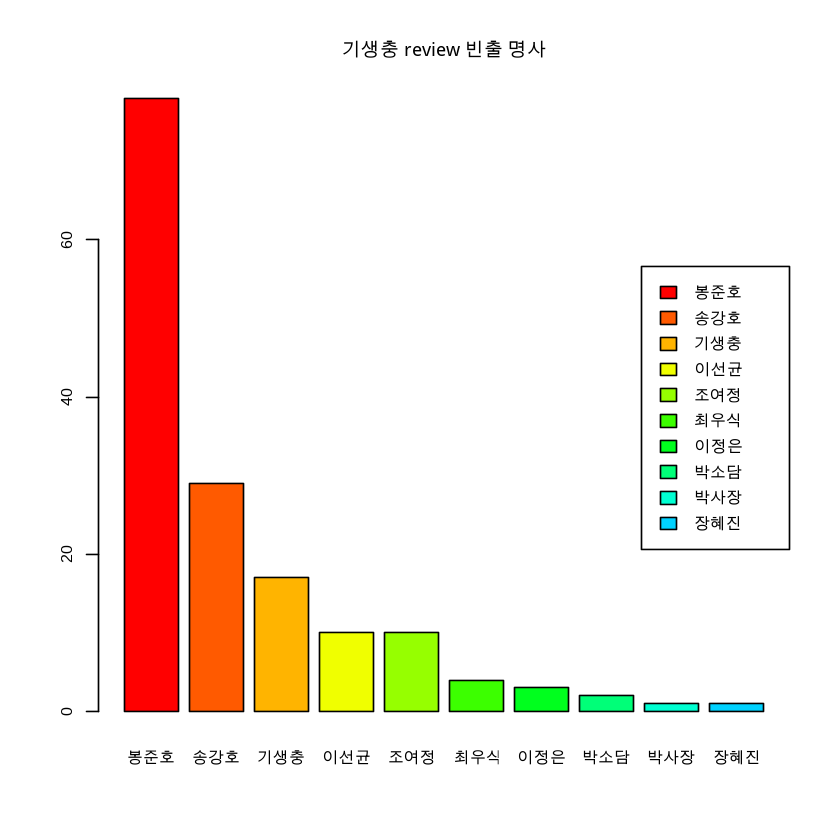

In [104]:
colors <- rainbow(nrow(d))
barplot(v[1:10], main = "기생충 review 빈출 명사", col = colors)
legend("right", names(v[1:10]), fill = colors)

### 3)
- extraNoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오.

In [105]:
movie_exN <- sapply(movie_clean, extractNoun)

In [106]:
Noun <- as.vector(unlist(movie_exN))

In [107]:
Noun_2 <- Noun[nchar(Noun) >= 2]

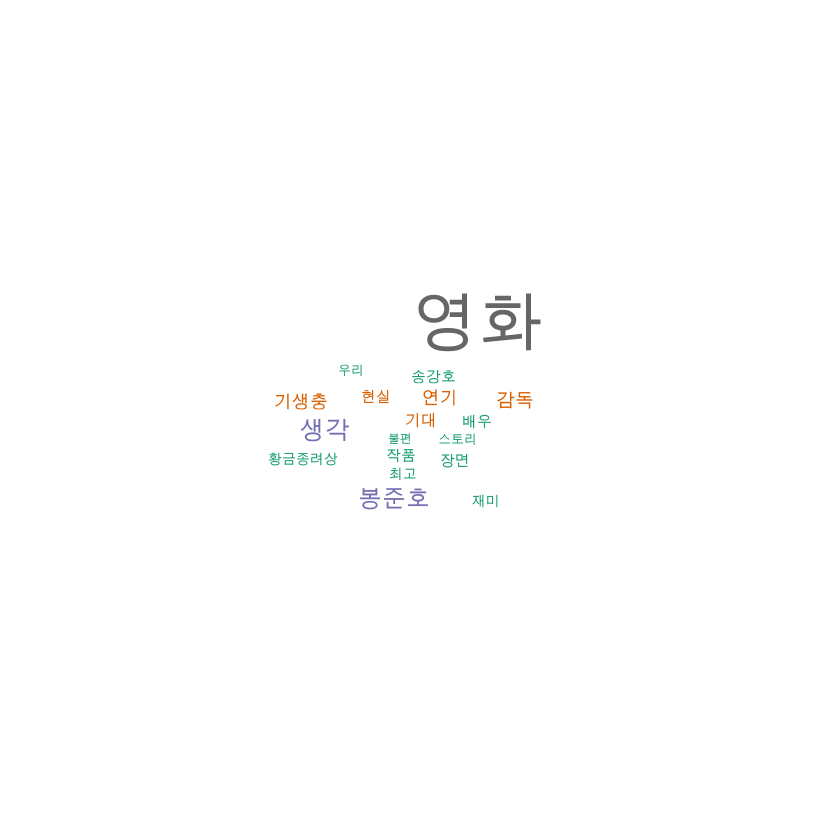

In [108]:
result <- data.frame(sort(table(Noun_2), decreasing = T))
t <- wordcloud(result$Noun_2, result$Freq, color = brewer.pal(8, "Dark2"), min.freq = 30)